In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import non_backtracking_tools as nbt
import scipy.linalg as la

In [3]:
# Define formulas for positive and negative roots
positive = lambda lambda_val, c, d: (lambda_val*c+np.sqrt((lambda_val*c)**2-4*c*d))/(2*c)
negative = lambda lambda_val, c, d: (lambda_val*c-np.sqrt((lambda_val*c)**2-4*c*d))/(2*c)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


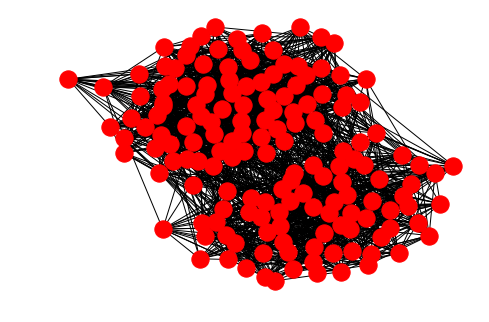

[29 24 23 23 22 22 22 29 24 34 34 28 29 29 23 22 33 25 19 36 30 27 24 23 22
 17 28 30 30 29 29 31 34 27 24 29 22 28 21 25 22 31 28 20 26 20 23 23 21 18
 34 29 18 21 30 25 25 26 26 27 34 28 20 20 26 26 26 29 22 25 24 24 20 23 23
 27 21 24 25 24 34 20 27 23 28 23 26 27 24 19 26 18 23 23 22 27 19 19 29 22
 27 23 29 28 20 25 26 26 21 25 24 20 23 18 24 24 26 20 25 20 20 20 17 27 16
 18 23 19 24 19 30 24 21 23 24 25 24 18 19 20 23 25 25 25 19 22 26 18 19 21
 25 13 14 18 29 30 24 26]
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [15]:
for _ in range(100):
    G = nx.random_partition_graph([np.random.randint(20,100),np.random.randint(20,100)],0.25,.05)
    F = list(nx.connected_component_subgraphs(G))
    G = F[0]
    A = nx.adjacency_matrix(G).todense()
    D = np.diag(list(dict(G.degree).values()))
    K = np.block([[A,D-np.eye(D.shape[0])],[-np.eye(D.shape[0]),np.zeros_like(D)]])
    P = nbt.trans_prob_matrix_nb(G)
    d_min = min(list(dict(G.degree).values()))
    d_max = max(list(dict(G.degree).values()))

    # Get necessary eigenvals
    lambda_vals, lambda_vecs = la.eig(A)
    # lambda_vals = lambda_vals[np.argsort(lambda_vals)]
    # lambda_vecs = lambda_vecs[:,np.argsort(lambda_vals)]
    mu_vals, mu_vecs = la.eig(K)
    # mu_vals = mu_vals[np.argsort(mu_vals)]
    # mu_vecs = mu_vecs[:,np.argsort(mu_vals)]
    Y = mu_vecs[mu_vecs.shape[0]//2:,:]
    rho_vals, rho_vecs = la.eig(P)
    # rho_vals = rho_vals[np.argsort(rho_vals)]
    # rho_vecs = rho_vecs[:,np.argsort(rho_vals)]

    rho_2 = np.sort(rho_vals)[-2]
    lambda_2 = np.sort(lambda_vals)[-2]
    c = lambda_vecs[:,np.argsort(lambda_vals)==len(lambda_vals)-2].T@Y[:,np.argsort(mu_vals)==len(mu_vals)-2]
    d = d_min - 1
    bound = lambda val, c, d: (val*c-np.sqrt((val*c)**2-4*c*d))/(2*c*d)
    try:
        val = bound(lambda_2,c,d)
    except:
        print(f'Degree one: {d_min-1}')
        continue

    if rho_2 <= val:
        print(True)
    else:
        nx.draw(G)
        plt.show()
        print(D.diagonal())
        print(False)

In [ ]:
for _ in range(100):
    G = nx.random_partition_graph([np.random.randint(20,100),np.random.randint(20,100)],0.25,.05)
    F = list(nx.connected_component_subgraphs(G))
    G = F[0]
    A = nx.adjacency_matrix(G).todense()
    D = np.diag(list(dict(G.degree).values()))
    K = np.block([[A,D-np.eye(D.shape[0])],[-np.eye(D.shape[0]),np.zeros_like(D)]])
    P = nbt.trans_prob_matrix_nb(G)
    d_min = min(list(dict(G.degree).values()))
    d_max = max(list(dict(G.degree).values()))

    # Get necessary eigenvals
    lambda_vals, lambda_vecs = la.eig(A)
    # lambda_vals = lambda_vals[np.argsort(lambda_vals)]
    # lambda_vecs = lambda_vecs[:,np.argsort(lambda_vals)]
    mu_vals, mu_vecs = la.eig(K)
    # mu_vals = mu_vals[np.argsort(mu_vals)]
    # mu_vecs = mu_vecs[:,np.argsort(mu_vals)]
    Y = mu_vecs[mu_vecs.shape[0]//2:,:]
    rho_vals, rho_vecs = la.eig(P)
    # rho_vals = rho_vals[np.argsort(rho_vals)]
    # rho_vecs = rho_vecs[:,np.argsort(rho_vals)]

    rho_2 = np.sort(rho_vals)[-2]
    lambda_2 = np.sort(rho_vals)[-2]

    if rho_2 > lambda_2/(d_max - 1):
        print(True)
    else:
        print(False)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
